<a href="https://colab.research.google.com/github/islam-mirajul/Spinach-Recognition-Using-Convolutional-neural-networks/blob/main/Spinach-Recognition(Xception).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TF Version:", tf.__version__)

TF Version: 2.2.0


In [ ]:
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)

TF hub Version: 0.8.0


In [ ]:
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")

GPU availabe


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3398075606416950757, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7088052317175160777
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15380930462951729518
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14648777152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3024035441159593927
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import os
import numpy as np
np.random.seed(777)

import keras
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model

from keras.applications.xception import Xception, preprocess_input
from keras.layers.core import Dropout, Dense
from keras.models import Model, load_model
from keras.initializers import he_normal, glorot_normal
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.regularizers import l2

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

Using TensorFlow backend.


In [ ]:
output_classes = 5
batch_size = 16
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 10
nb_train_samples =3028  
nb_test_samples =757

In [ ]:
train_dir = '/content/drive/My Drive/Spinach Classification/Train set'
test_dir = '/content/drive/My Drive/Spinach Classification/Test set'

In [ ]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))


print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/drive/My Drive/Spinach Classification/Train set 0
/content/drive/My Drive/Spinach Classification/Train set/Water Spinach 595
/content/drive/My Drive/Spinach Classification/Train set/Malabar Spinach 606
/content/drive/My Drive/Spinach Classification/Train set/Jute Spinach 600
/content/drive/My Drive/Spinach Classification/Train set/Taro Spinach 618
/content/drive/My Drive/Spinach Classification/Train set/Red Spinach 609
******************************
/content/drive/My Drive/Spinach Classification/Test set 0
/content/drive/My Drive/Spinach Classification/Test set/Malabar Spinach 152
/content/drive/My Drive/Spinach Classification/Test set/Red Spinach 152
/content/drive/My Drive/Spinach Classification/Test set/Water Spinach 149
/content/drive/My Drive/Spinach Classification/Test set/Jute Spinach 150
/content/drive/My Drive/Spinach Classification/Test set/Taro Spinach 154


In [ ]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 3028 images belonging to 5 classes.
Found 757 images belonging to 5 classes.


In [ ]:
sgd_opt = SGD(lr = 0.02, decay=75e-6, momentum=0.9, nesterov=True)
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

In [ ]:
model = Sequential()

model.add(Xception(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))

model.layers[0].trainable = True

83689472/83683744 [==============================] - 3s 0us/step


In [ ]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 20,871,725
Trainable params: 20,817,197
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/10
189/189 [==============================] - 3851s 20s/step - loss: 0.9011 - accuracy: 0.7679 - val_loss: 0.6713 - val_accuracy: 0.9747
Epoch 2/10
189/189 [==============================] - 572s 3s/step - loss: 0.2080 - accuracy: 0.9851 - val_loss: 0.1927 - val_accuracy: 0.9892
Epoch 3/10
189/189 [==============================] - 567s 3s/step - loss: 0.0832 - accuracy: 0.9954 - val_loss: 0.1370 - val_accuracy: 0.9892
Epoch 4/10
189/189 [==============================] - 566s 3s/step - loss: 0.0481 - accuracy: 0.9977 - val_loss: 0.1616 - val_accuracy: 0.9892
Epoch 5/10
189/189 [==============================] - 563s 3s/step - loss: 0.0294 - accuracy: 0.9987 - val_loss: 0.0826 - val_accuracy: 0.9892
Epoch 6/10
189/189 [==============================] - 563s 3s/step - loss: 0.0247 - accuracy: 0.9977 - val_loss: 0.0144 - val_accuracy: 0.9919
Epoch 7/10
189/189 [==============================] - 567s 3s/step - loss: 0.0177 - accuracy: 0.9990 - val_loss: 0.0145 - val_accuracy: 1.00

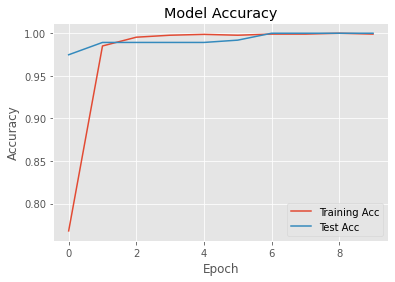

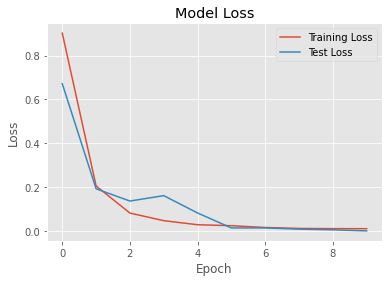

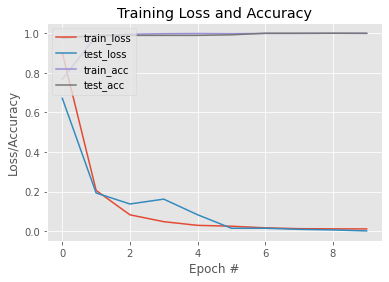

In [ ]:

plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="test_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
score = model.evaluate_generator(test_generator, steps=5)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

Validation Score:  0.0010820524767041206
Validation Accuracy:  1.0


In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

48/47 [==============================] - 108s 2s/step
No of errors = 0/757


Confusion Matrix
[[150   0   0   0   0]
 [  0 152   0   0   0]
 [  0   0 152   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 149]]


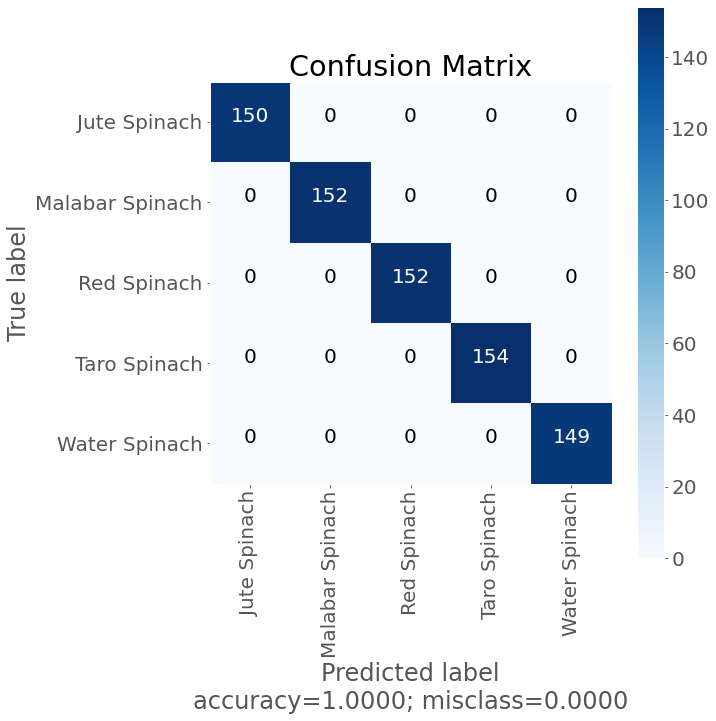

In [ ]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    ##plt.savefig('plots/12.DenseNet-DataSet-CM.png', bbox_inches='tight', dpi = 100) 
plt.figure(figsize=(10,10))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[150   0   0   0   0]
 [  0 152   0   0   0]
 [  0   0 152   0   0]
 [  0   0   0 154   0]
 [  0   0   0   0 149]]
                 precision    recall  f1-score   support

   Jute Spinach       1.00      1.00      1.00       150
Malabar Spinach       1.00      1.00      1.00       152
    Red Spinach       1.00      1.00      1.00       152
   Taro Spinach       1.00      1.00      1.00       154
  Water Spinach       1.00      1.00      1.00       149

       accuracy                           1.00       757
      macro avg       1.00      1.00      1.00       757
   weighted avg       1.00      1.00      1.00       757



In [ ]:
total=sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1]) / total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity )

Accuracy :  0.3989431968295905
Sensitivity :  1.0
Specificity :  1.0


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

th = 0.3

acc = accuracy_score(truth,predict_class > th)
prec = precision_score(truth,predict_class > th,average="weighted")
f1 = f1_score(truth,predict_class > th,average="weighted")
recall = recall_score(truth,predict_class > th,average="weighted")

print('Accuracy:  {:.4f}'.format(acc))
print('Precision: {:.4f}'.format(prec))
print('Recall:    {:.4f}'.format(recall))
print('F1:        {:.4f}'.format(f1))

Accuracy:  0.3989
Precision: 0.2484
Recall:    0.3989
F1:        0.2786


In [ ]:
model.save('/content/drive/My Drive/Spinach model/Xception-spinach-model.h5')
model.save_weights('/content/drive/My Drive/Spinach model/Xception-spinach-Weights.h5')